# Predictions on embryo transfers

# EDA 

Firstly basic preparations.

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from warnings import filterwarnings 
filterwarnings('ignore')

df = pd.read_csv('embryo_data.csv')
df.head()

,pn_ds_time,first_clvg_time,t2,t3,t4,t5,t6,t8,compact_start,compacted_time,cavitation_start,full_blast,frzdt,mytarget,singletransfer
0,22.50,26.00,26.00,30.00,39.17,52.67,56.00,62.00,86.33,103.67,107.50,NaN,False,False,True
1,22.00,24.83,24.83,36.83,37.33,52.33,53.17,73.17,86.00,91.17,99.83,111.67,False,False,True
2,23.83,26.17,26.17,27.50,30.00,38.50,40.83,53.33,85.83,100.00,102.00,115.00,False,False,True
3,23.83,27.00,27.00,38.67,38.83,51.00,52.67,54.33,95.17,111.67,NaN,NaN,False,False,True
4,23.17,48.00,48.00,48.00,48.00,54.33,55.83,70.33,83.17,91.00,99.50,110.33,False,False,True


In [262]:
df['frzdt'] = df['frzdt'].astype(int)
df['mytarget'] = df['mytarget'].astype(int)

In [263]:
df['nulls'] = df.isnull().sum(axis= 1 )
df.value_counts('nulls')

nulls
0     209
1      52
2      33
3      29
4      10
5       8
6       5
11      5
9       4
7       2
8       1
Name: count, dtype: int64

In [264]:
df = df[df.nulls<9]
df.value_counts('mytarget')

mytarget
0    200
1    149
Name: count, dtype: int64

In [265]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
df = pd.DataFrame (imputer.fit_transform(df), columns = df.columns)
df

,pn_ds_time,first_clvg_time,t2,t3,t4,t5,t6,t8,compact_start,compacted_time,cavitation_start,full_blast,frzdt,mytarget,singletransfer,nulls
0,22.50,26.00,26.00,30.00,39.17,52.67,56.00,62.00,86.33,103.67,107.500000,113.714286,0.0,0.0,1.0,1.0
1,22.00,24.83,24.83,36.83,37.33,52.33,53.17,73.17,86.00,91.17,99.830000,111.670000,0.0,0.0,1.0,0.0
2,23.83,26.17,26.17,27.50,30.00,38.50,40.83,53.33,85.83,100.00,102.000000,115.000000,0.0,0.0,1.0,0.0
3,23.83,27.00,27.00,38.67,38.83,51.00,52.67,54.33,95.17,111.67,107.093329,110.547571,0.0,0.0,1.0,2.0
4,23.17,48.00,48.00,48.00,48.00,54.33,55.83,70.33,83.17,91.00,99.500000,110.330000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,23.83,26.50,26.50,36.50,36.83,48.33,49.00,63.67,71.50,87.33,93.500000,104.428571,0.0,0.0,0.0,1.0
345,22.33,24.67,24.67,34.83,35.17,41.83,46.83,47.17,63.00,74.33,83.670000,99.500000,1.0,1.0,0.0,0.0
346,20.33,22.67,22.67,33.33,33.50,45.50,46.33,46.83,67.83,74.00,94.170000,102.620000,1.0,1.0,0.0,1.0
347,24.67,27.00,27.00,29.00,31.00,39.00,39.50,48.17,53.50,92.33,94.690471,104.690000,1.0,1.0,0.0,2.0


In [266]:
df['cc1'] = df['t2']
df['cc2'] = df['t3'] - df['t2']
df['cc3'] = df['t5'] - df['t3']
df['s2'] = df['t4'] - df['t3']
df['s3'] = df['t8'] - df['t5']

In [267]:
df = df.drop(['t2','nulls'], axis = 1)

In [268]:
cols = ['pn_ds_time', 'first_clvg_time', 't3','t4','t5','t6','t8', 'compact_start',
       'compacted_time', 'cavitation_start', 'full_blast', 'cc1']

for i in cols:
    df[i] = df[i] - df['pn_ds_time']
    
df = df.drop('pn_ds_time', axis = 1)

## T-test

In [269]:
singletrans = df.loc[df['singletransfer'] == 1]
jointtrans = df.loc[df['singletransfer'] == 0]

dict1 = {}
for i in singletrans.columns:
    dict1.setdefault(i, singletrans[i].median())
    
dict2 = {}
for i in jointtrans.columns:
    dict2.setdefault(i, jointtrans[i].median())

dict1_df = pd.DataFrame(dict1.items(), columns=['column', 'singletrans'])
dict2_df = pd.DataFrame(dict2.items(), columns=['column', 'jointtrans'])
res = pd.concat([dict1_df, dict2_df['jointtrans']], axis = 1)
res

,column,singletrans,jointtrans
0,first_clvg_time,27.000000,28.170000
1,t3,37.330000,38.416650
2,t4,38.830000,40.500000
3,t5,51.000000,51.831650
4,t6,53.000000,54.250000
5,t8,59.737143,61.439529
6,compact_start,77.000000,80.915000
7,compacted_time,88.500000,92.915000
8,cavitation_start,98.000000,101.830000
9,full_blast,109.832857,111.810000


In [270]:
cols_to_check = ['first_clvg_time', 't3', 't4', 't5', 't6', 't8', 'compact_start',
       'compacted_time', 'cavitation_start', 'full_blast', 'cc1', 'cc2', 'cc3', 's2', 's3']
import scipy.stats as stats
gr2 = df[i][(df['singletransfer'] == 0)&(df['mytarget'] == 1)]
for i in cols_to_check:
    gr1 = df[i][(df['singletransfer'] == 1)&(df['mytarget'] == 0)][0:59]
    gr2 = df[i][(df['singletransfer'] == 0)&(df['mytarget'] == 0)]
    print(f'p-value {i}: {stats.wilcoxon(gr1, gr2)[1]}')

p-value first_clvg_time: 0.5017012780279433
p-value t3: 0.7206865259201909
p-value t4: 0.6670171729468067
p-value t5: 0.9668850589468216
p-value t6: 0.466374848644588
p-value t8: 0.3227615248116751
p-value compact_start: 0.631726515972199
p-value compacted_time: 0.6725238936938076
p-value cavitation_start: 0.5790463734370784
p-value full_blast: 0.9819343033826566
p-value cc1: 0.5017012780279433
p-value cc2: 0.6625317755873947
p-value cc3: 0.9518487558896375
p-value s2: 0.8256568521187011
p-value s3: 0.4021254571316092


P-values for all features are higher than 0.05 so we can use samles both for single transfers and for joint transfers in future models.

## Distributions of numerical features

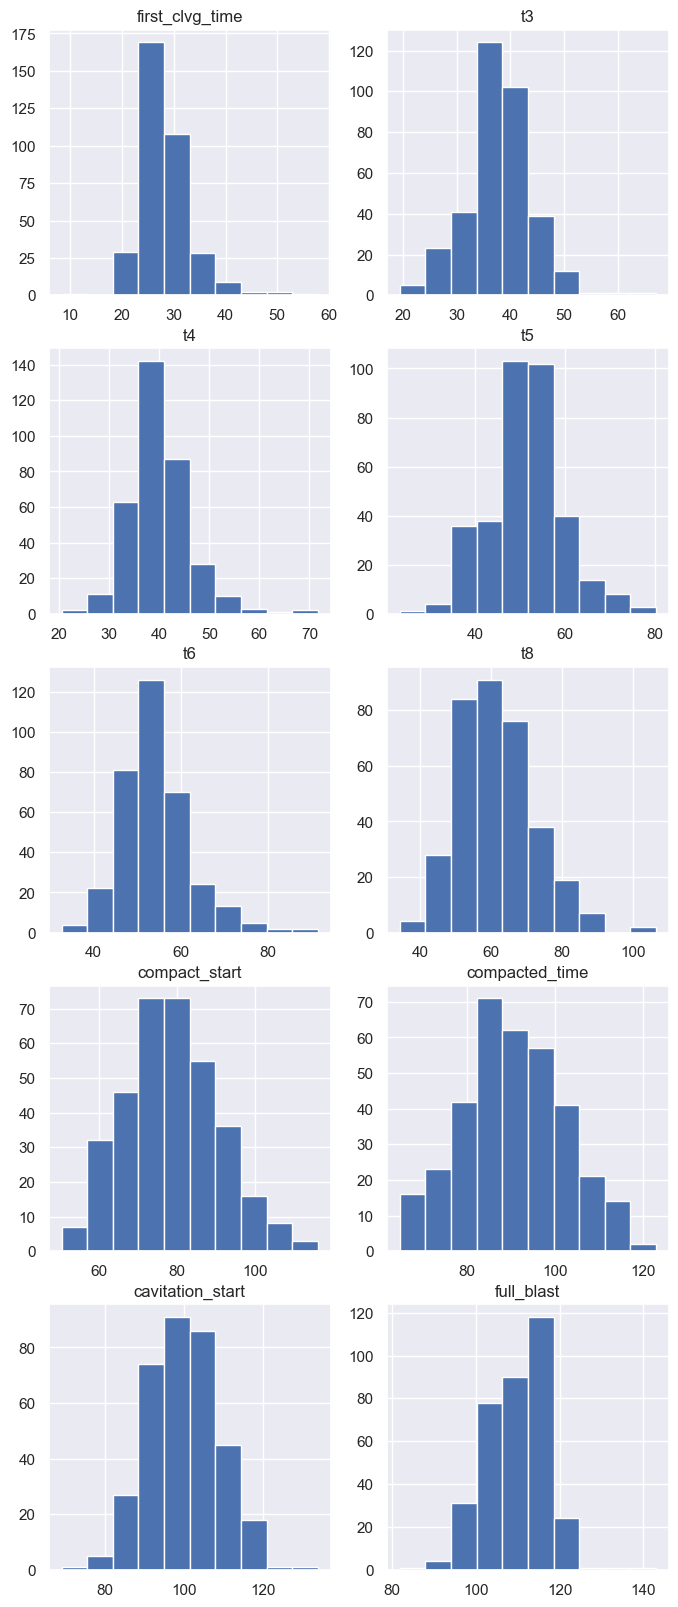

In [271]:
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize=(8, 20))
for i in range(len(cols_to_check[:-5])):
    row = i // 2
    col = i % 2
    axs[row][col].hist(df[cols_to_check[i]])
    axs[row][col].set_title(cols_to_check[i])

plt.show()

Distributions of real features are close to normal but for some models such as logistic regression we have to look at outliers.

## Outliers

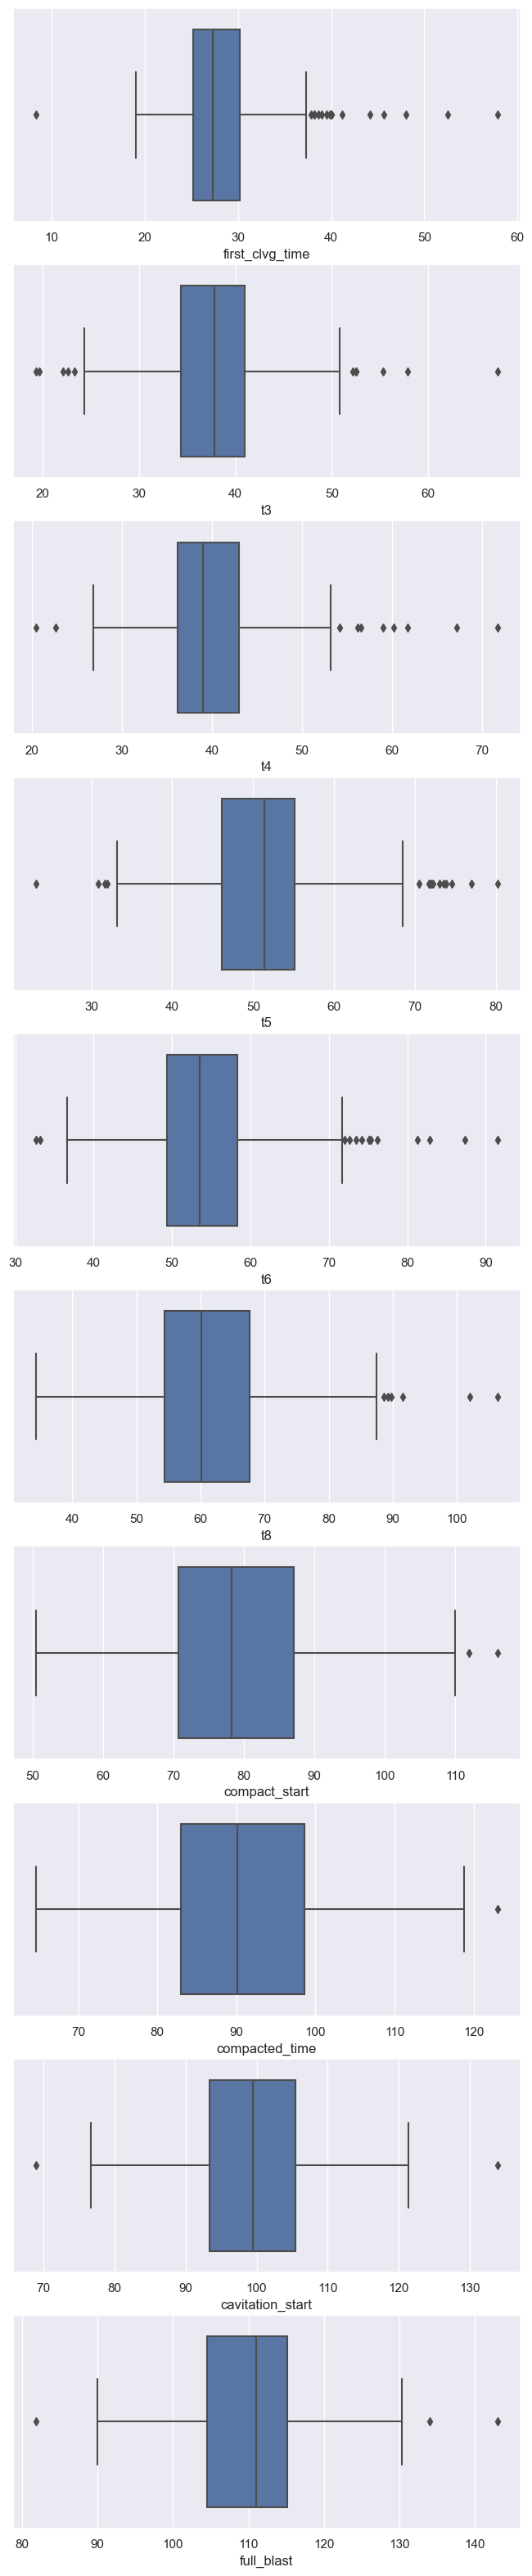

In [272]:
fig, axs = plt.subplots(10, figsize=(8, 40))
for i, column in enumerate(cols_to_check[:-5]):
    sns.boxplot(x=column, data=df, ax=axs[i]);

Too many outliers for this dataset but we'll see the effiency of deleting outliers on linear model later. So let's get rid off outliers creating the function.

In [273]:
def preprocessing_outliers(data):
    data = df.copy()
    data = data[~((data['first_clvg_time']>40)|(data['first_clvg_time']<10)|(data['t3']>51)|(data['t3']<24)|(data['t4']>53)|(data['t4']<25)|(data['t5']>70)|(data['t5']<33)|(data['t8']>88)|(data['compacted_time']>120)|(data['cavitation_start']>130)|(data['cavitation_start']<70)|(data['full_blast']>130)|(data['full_blast']<85))]
    return data

In [274]:
preprocessing_outliers(df).value_counts('mytarget')

mytarget
0.0    175
1.0    141
Name: count, dtype: int64

As we can see, it's not that bad and we still have enough objects comparing to initial dataset.

## Correlations

Firstly, we need to find out whether the data is multicollinear and then we may be able to get rid off some features.

In [275]:
num_features = ['first_clvg_time', 't3', 't4', 't5', 't6', 't8', 'compact_start',
       'compacted_time', 'cavitation_start', 'full_blast', 'cc1', 'cc2', 'cc3', 's2', 's3']

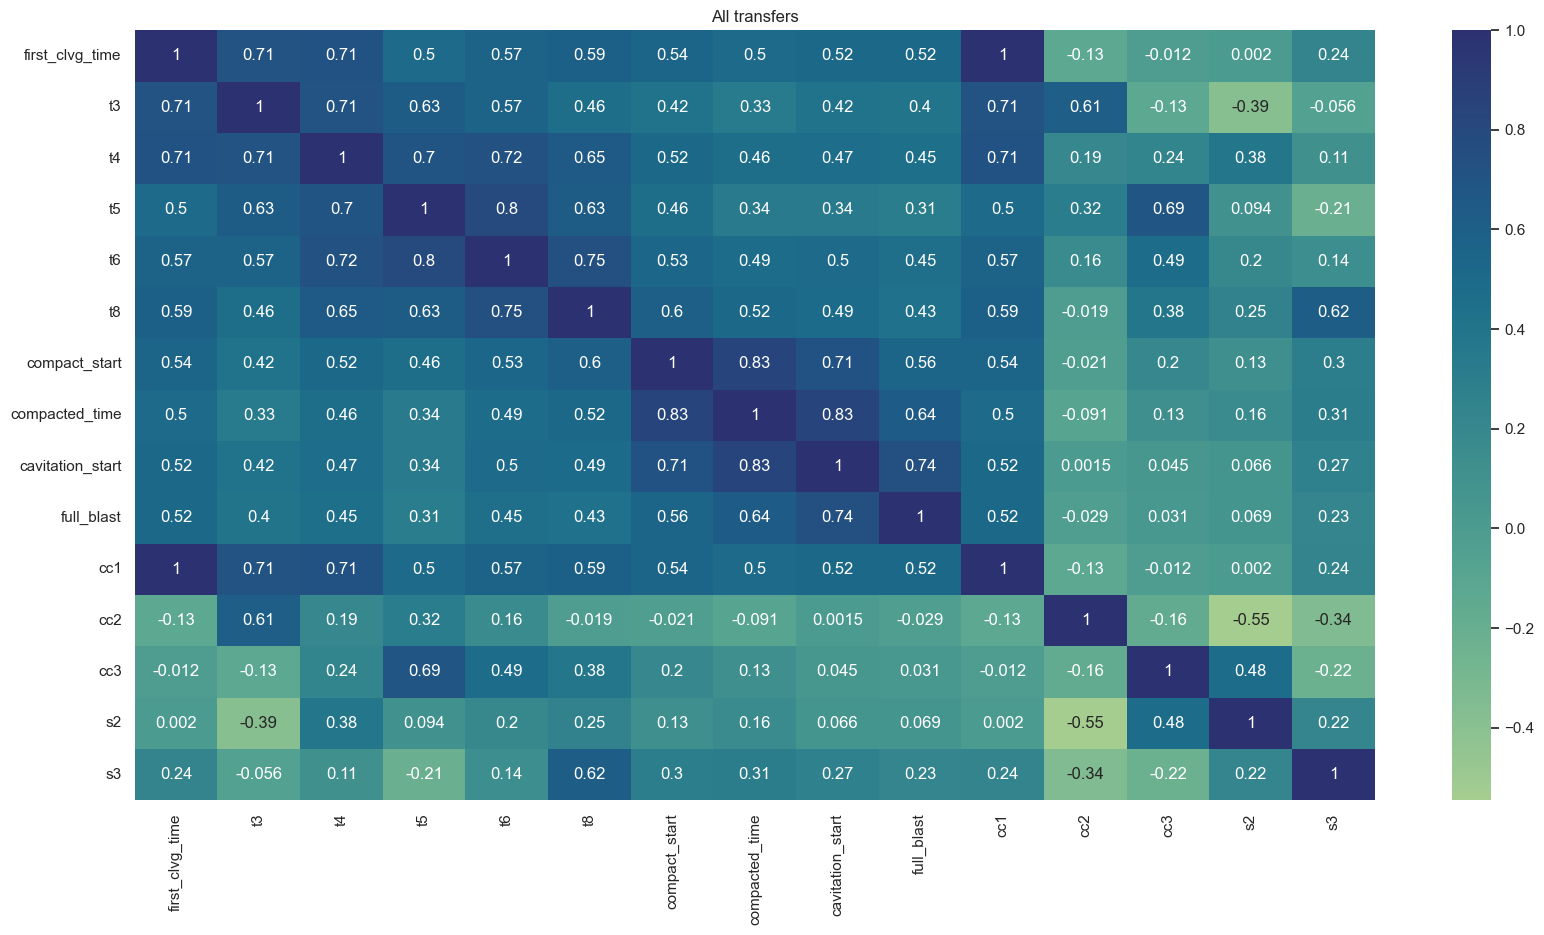

In [276]:
correlation = df[num_features].corr()
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(correlation, annot = True, cmap='crest').set(title='All transfers');

Let 0.8 to be threshold.

According to matrix, we can drop the following features: cc1, compact_start, t6. It also helps us with dimensionality reduction.

In [277]:
df = df.drop(labels = ['cc1', 'compact_start', 't6'], axis = 1)

In [278]:
df

,first_clvg_time,t3,t4,t5,t8,compacted_time,cavitation_start,full_blast,frzdt,mytarget,singletransfer,cc2,cc3,s2,s3
0,26.00,30.00,39.17,52.67,62.00,103.67,107.500000,113.714286,0.0,0.0,1.0,4.00,22.67,9.17,9.33
1,24.83,36.83,37.33,52.33,73.17,91.17,99.830000,111.670000,0.0,0.0,1.0,12.00,15.50,0.50,20.84
2,26.17,27.50,30.00,38.50,53.33,100.00,102.000000,115.000000,0.0,0.0,1.0,1.33,11.00,2.50,14.83
3,27.00,38.67,38.83,51.00,54.33,111.67,107.093329,110.547571,0.0,0.0,1.0,11.67,12.33,0.16,3.33
4,48.00,48.00,48.00,54.33,70.33,91.00,99.500000,110.330000,0.0,0.0,1.0,0.00,6.33,0.00,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,26.50,36.50,36.83,48.33,63.67,87.33,93.500000,104.428571,0.0,0.0,0.0,10.00,11.83,0.33,15.34
345,24.67,34.83,35.17,41.83,47.17,74.33,83.670000,99.500000,1.0,1.0,0.0,10.16,7.00,0.34,5.34
346,22.67,33.33,33.50,45.50,46.83,74.00,94.170000,102.620000,1.0,1.0,0.0,10.66,12.17,0.17,1.33
347,27.00,29.00,31.00,39.00,48.17,92.33,94.690471,104.690000,1.0,1.0,0.0,2.00,10.00,2.00,9.17


It's better to usepoint-biserial correlation for target feature.

In [279]:
names, corrs = [], []

for i in df[df.columns.to_list()]:
    if i!='frzdt' or i!='singletransfer':
        names.append(i)
        corrs.append(stats.pointbiserialr(df[i], df['mytarget'])[0])
pd.DataFrame({'column': names, 'correlation': corrs})


,column,correlation
0,first_clvg_time,-0.111113
1,t3,0.046737
2,t4,-0.074939
3,t5,-0.006034
4,t8,-0.121046
5,compacted_time,-0.201427
6,cavitation_start,-0.149151
7,full_blast,-0.163668
8,frzdt,0.162153
9,mytarget,1.000000


IndexError: index 4 is out of bounds for axis 0 with size 4

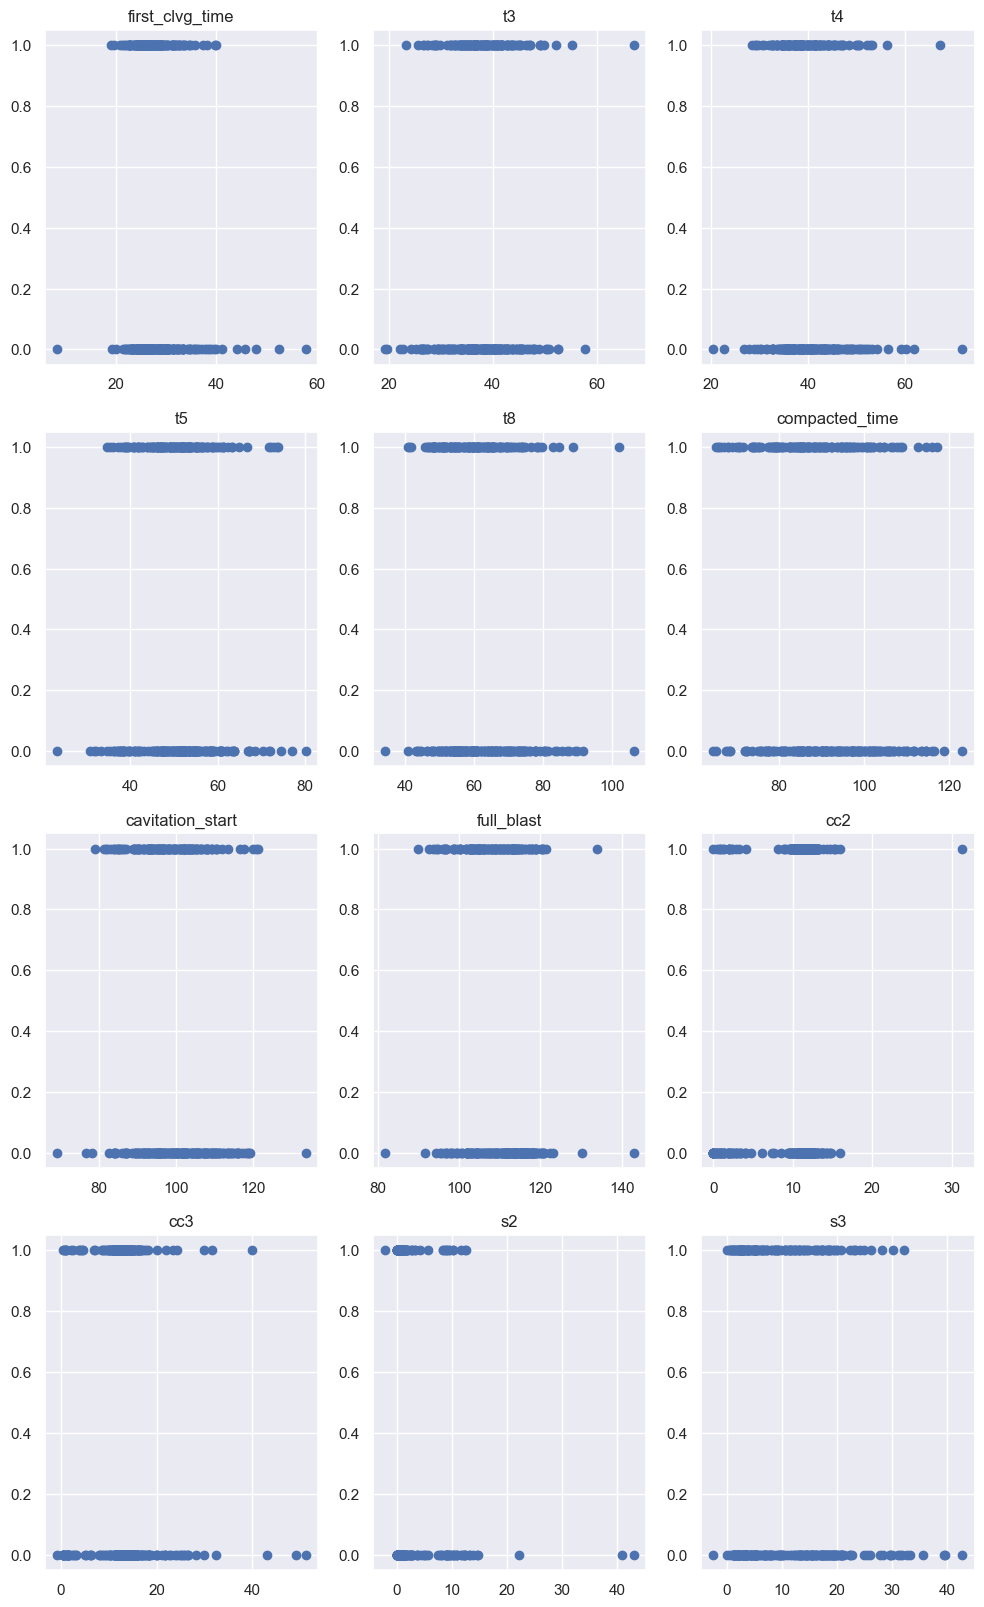

In [281]:
new_features = ['first_clvg_time', 't3', 't4', 't5', 't8', 'compacted_time',
       'cavitation_start', 'full_blast', 'cc2', 'cc3', 's2', 's3']
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize=(12, 20))
for i in range(len(df[new_features])):
    row = i // 3
    col = i % 3
    axs[row][col].scatter(df[new_features[i]], df.mytarget)
    axs[row][col].set_title(new_features[i])
plt.show()
#can't understand IndexError sry :)

Overally, the data is lowcorrelated. Making a conclusion that it's better not to use linear models.

Good news, in other jupyter notebook we can see the data is non-linearly dependent.

## Bin-feature to bin-target.

In [282]:
bin_features = ['frzdt', 'singletransfer']

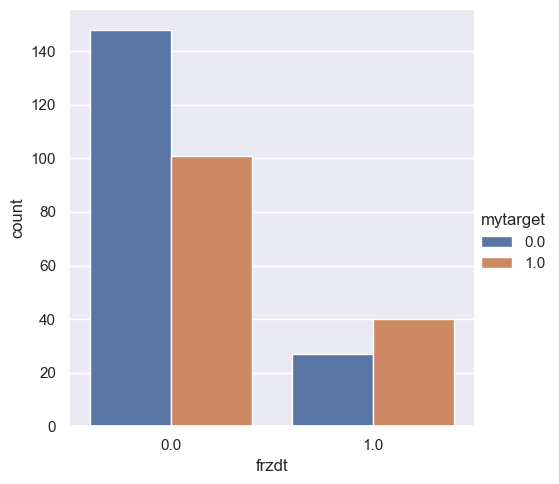

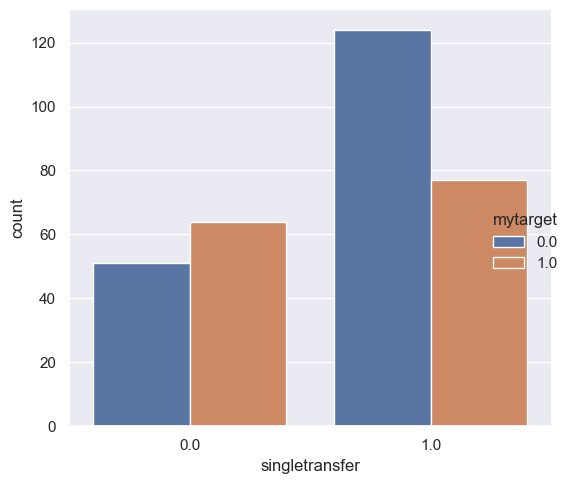

In [283]:
for i in bin_features:
    sns.catplot(x=i, hue = 'mytarget', data = preprocessing_outliers(df), kind = 'count')
plt.tight_layout()

We can see that frozen and single transferd embryos are more likely to be successful. So these features are important. 

## Models implementing

### For obvious reasons the following algorythms will be used:
    
    1. KNN;
    2. Polynomial logistic regression;
    3. Desicion tree;
    4. SVC (due to non-linear kernels);
    5. Ensembles of previous models;
    6. ANN.

In [975]:
def get_metrics(preds, y_test):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for pred, true in zip(preds, y_test):
        if pred == 1 and true == 1:
            tp += 1
        elif pred == 0 and true == 0:
            tn += 1
        elif pred == 1 and true == 0:
            fp += 1
        elif pred == 0 and true == 1:
            fn += 1

    return round(1-fp/(fp+tn),2), round(tp/(tp+fn),2)

In [435]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
data = preprocessing_outliers(df)
sc = StandardScaler()
data_std = pd.DataFrame(sc.fit_transform(data), columns = data.columns.to_list())


In [667]:
params = {'KNN':{'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15], 
                'weights':['uniform', 'distance'], 
                 'algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
                'p':[1,2]},
         'LR':{'C': [0.0001, 0.001, 0.01, 10, 0.0005],
               'solver': ['saga', 'sag', 'newton-cg']},
         'DecisionTree':{ 'criterion':['gini', 'entropy'], 
                         'min_samples_split':[2,5,10], 
                         'min_samples_leaf':[2,5,10],
                         'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14],
                         'max_features': ['sqrt', 'log2', None] 
                         #'splitter':['best','random']}
                        }}

In [602]:
X1 = data_std.drop('mytarget', axis = 1)
X2 = data.drop('mytarget', axis = 1)
y = data['mytarget']
y_rev = y.apply(lambda x: 0 if x == 1 else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN

In [438]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
data = preprocessing_outliers(df)
sc = StandardScaler()
data_std = pd.DataFrame(sc.fit_transform(data), columns = data.columns.to_list())

In [439]:
X1 = data_std.drop('mytarget', axis = 1)
X2 = data.drop('mytarget', axis = 1)
y = data['mytarget']
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)                  

In [513]:
neigh = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 7, p = 2, weights = 'distance')
neigh.fit(X_train, y_train)
neigh_preds_train = neigh.predict(X_train)
neigh.predict(X_test)
print(classification_report(y_test, neigh_preds_test))

              precision    recall  f1-score   support

         0.0       0.58      0.76      0.66        29
         1.0       0.73      0.54      0.62        35

    accuracy                           0.64        64
   macro avg       0.65      0.65      0.64        64
weighted avg       0.66      0.64      0.64        64



## Polynomial LR

In [584]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree = 5, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)
LR = LogisticRegression(max_iter = 1000, penalty = 'l2', n_jobs = -1, C = 0.05)
LR.fit(X_poly, y_train)
pipe = Pipeline([('polynomial_features', poly), ('logistic_regression', LR)])
pipe.predict(X_test)
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.59      0.66      0.62        29
         1.0       0.69      0.63      0.66        35

    accuracy                           0.64        64
   macro avg       0.64      0.64      0.64        64
weighted avg       0.65      0.64      0.64        64



## Desicion Tree

In [607]:
from sklearn.tree import DecisionTreeClassifier
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y, test_size=0.2, random_state=42)

In [969]:
DTC = DecisionTreeClassifier(random_state = 42, criterion = 'entropy',
 max_depth = 12,
 max_features = 'sqrt',
 min_samples_leaf = 2,
 min_samples_split = 10,
 splitter = 'best',
ccp_alpha=0.0155)
DTC.fit(X_train1, y_train1)
DTC_preds = DTC.predict(X_test1)
print(classification_report(y_test1, DTC_preds))

              precision    recall  f1-score   support

         0.0       0.59      0.66      0.62        29
         1.0       0.69      0.63      0.66        35

    accuracy                           0.64        64
   macro avg       0.64      0.64      0.64        64
weighted avg       0.65      0.64      0.64        64



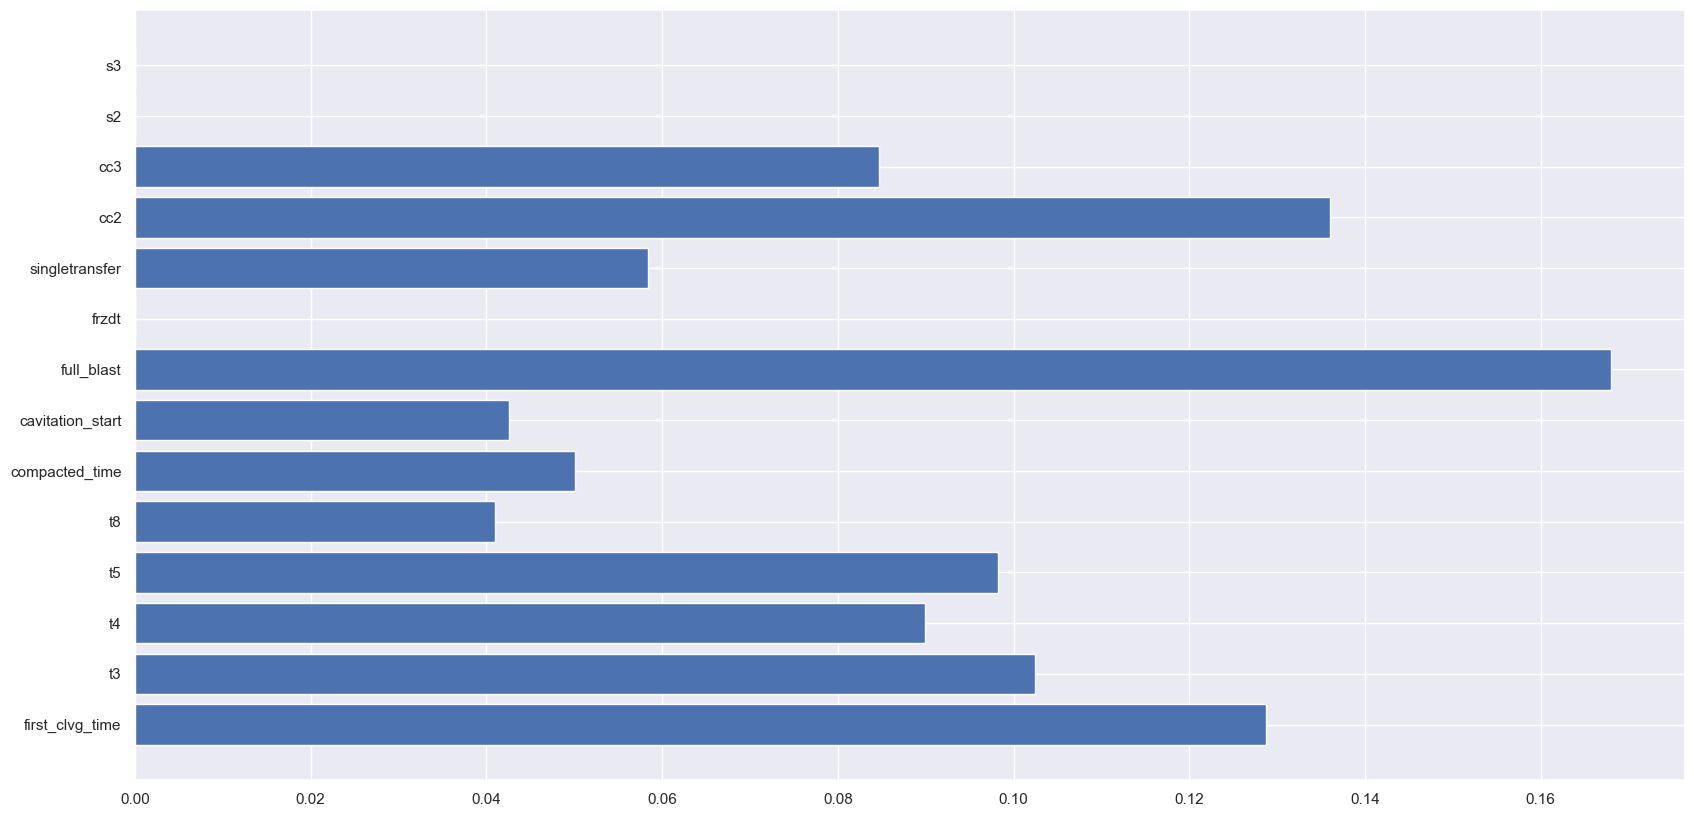

In [678]:
plt.barh(np.arange(len(DTC.feature_importances_)), DTC.feature_importances_)
plt.yticks(np.arange(len(X.columns)), X.columns)
plt.show()

## SVC

In [699]:
from sklearn.svm import SVC
SVC = SVC(C = 300, kernel = 'rbf', gamma = 'scale', probability = True)
SVC.fit(X_train, y_train)
SVC_preds_test = SVC.predict(X_test)
SVC.predict(X_test)
print(classification_report(y_test, SVC_preds_test))

              precision    recall  f1-score   support

         0.0       0.59      0.66      0.62        29
         1.0       0.69      0.63      0.66        35

    accuracy                           0.64        64
   macro avg       0.64      0.64      0.64        64
weighted avg       0.65      0.64      0.64        64



## Ensembling

In [1009]:
from sklearn.ensemble import VotingClassifier
VC = VotingClassifier(estimators = [('dt', DTC), 
                         #('knn', neigh), 
                         ('lr', LR),
                         ('svc', SVC)], voting = 'soft',
                         flatten_transform = False)
VC.fit(X_train, y_train)
VC_preds = VC.predict(X_test)
print(classification_report(y_test, VC_preds))

              precision    recall  f1-score   support

         0.0       0.58      0.72      0.65        29
         1.0       0.71      0.57      0.63        35

    accuracy                           0.64        64
   macro avg       0.65      0.65      0.64        64
weighted avg       0.65      0.64      0.64        64



## ANN

In [945]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

model = torch.nn.Sequential(
    torch.nn.Linear(14, 128),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(128),
    torch.nn.Dropout(p=0.2),
    torch.nn.Linear(128, 64),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(64),
    torch.nn.Dropout(p=0.2),
    torch.nn.Linear(64, 32),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(32),
    torch.nn.Dropout(p=0.2),
    torch.nn.Linear(32, 1),
    torch.nn.Sigmoid())

In [946]:
model

Sequential(
  (0): Linear(in_features=14, out_features=128, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.2, inplace=False)
  (8): Linear(in_features=64, out_features=32, bias=True)
  (9): ReLU()
  (10): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Dropout(p=0.2, inplace=False)
  (12): Linear(in_features=32, out_features=1, bias=True)
  (13): Sigmoid()
)

In [952]:
import time
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
criterion = torch.nn.BCELoss()
training = optim.Adam(model.parameters(), lr = .01)
num_epochs = 1000

In [953]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [954]:
X_train2 = torch.tensor(X_train2.values, dtype=torch.float32)
X_test2 = torch.tensor(X_test2.values, dtype=torch.float32)
y_train2 = torch.tensor(y_train2.values, dtype=torch.float32)
y_test2 = torch.tensor(y_test2.values, dtype=torch.float32)

In [956]:
from sklearn.metrics import recall_score

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train2 = X_train2.to(device)
X_test2 = X_test2.to(device)
y_train2 = y_train2.to(device)
y_test2 = y_test2.to(device)
model = model.to(device)

for epoch in range(num_epochs):
    train_iters, train_passed = 0, 0
    train_loss, train_rec0, train_rec1 = 0., 0., 0.
    start = time.time()
    
    model.train()
    outputs = model(X_train2)
    loss = criterion(outputs.squeeze(), y_train2)
    training.zero_grad()
    loss.backward()
    training.step()
    
    with torch.no_grad():
            val_outputs = model(X_test2)
            val_preds = (val_outputs >= 0.5).float()

            val_recall = recall_score(y_test2.cpu(), val_preds.cpu())
            print(f"Epoch {epoch+1}/{num_epochs} - Loss: {loss.item()} - Validation Recall: {val_recall}")

Epoch 1/1000 - Loss: 0.007118556648492813 - Validation Recall: 0.45714285714285713
Epoch 2/1000 - Loss: 0.01409608032554388 - Validation Recall: 0.5142857142857142
Epoch 3/1000 - Loss: 0.03663993254303932 - Validation Recall: 0.4857142857142857
Epoch 4/1000 - Loss: 0.018673941493034363 - Validation Recall: 0.5428571428571428
Epoch 5/1000 - Loss: 0.009397001005709171 - Validation Recall: 0.45714285714285713
Epoch 6/1000 - Loss: 0.025438902899622917 - Validation Recall: 0.5142857142857142
Epoch 7/1000 - Loss: 0.021799542009830475 - Validation Recall: 0.5714285714285714
Epoch 8/1000 - Loss: 0.004961298778653145 - Validation Recall: 0.45714285714285713
Epoch 9/1000 - Loss: 0.0198013074696064 - Validation Recall: 0.5142857142857142
Epoch 10/1000 - Loss: 0.020788036286830902 - Validation Recall: 0.5142857142857142
Epoch 11/1000 - Loss: 0.005141525529325008 - Validation Recall: 0.42857142857142855
Epoch 12/1000 - Loss: 0.028782276436686516 - Validation Recall: 0.5142857142857142
Epoch 13/1000

Currently neural network is working bad but I tried.

## Table with results

In [996]:
table = pd.DataFrame(index = ['KNN', 'PolyLogReg', 'SVC', 'VotingClf', 'DecTreeClf'], columns=['recall_0', 'recall_1'])
list_of_models = [neigh, pipe, SVC, VC]

In [998]:
for i in range(len(list_of_models)):
    table.recall_0[i] = get_metrics(list_of_models[i].predict(X_test), y_test)[0]
    table.recall_1[i] = get_metrics(list_of_models[i].predict(X_test), y_test)[1]

In [999]:
table.recall_0[4] = get_metrics(DTC.predict(X_test1), y_test)[0]
table.recall_1[4] = get_metrics(DTC.predict(X_test1), y_test)[1]

In [1000]:
table

,recall_0,recall_1
KNN,0.76,0.54
PolyLogReg,0.66,0.63
SVC,0.66,0.63
VotingClf,0.72,0.57
DecTreeClf,0.66,0.63


## Graphs

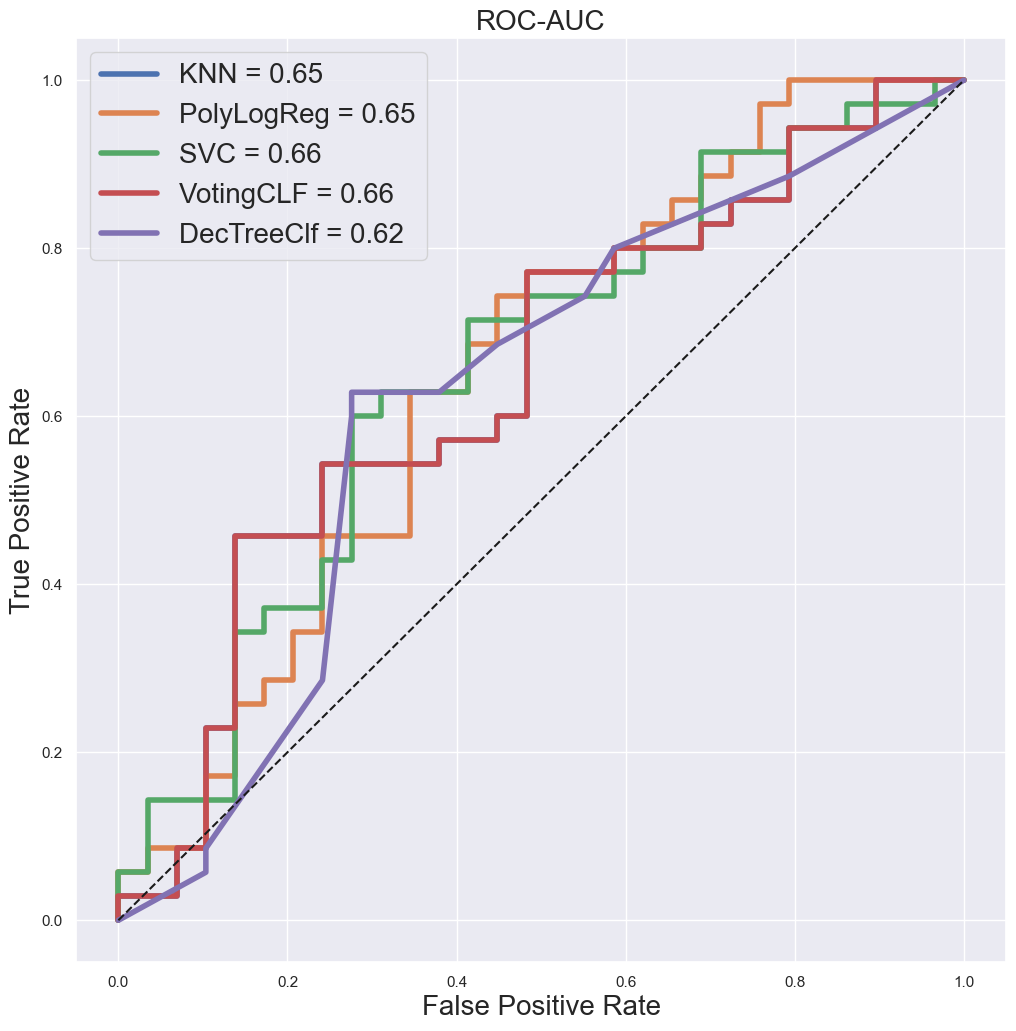

In [1045]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
fig, ax = plt.subplots(figsize=(12, 12))
fpr_knn, tpr_knn, t_knn = roc_curve(y_test, neigh.predict_proba(X_test)[:, 1])
ax.plot(fpr_knn, tpr_knn, 
        label=f'KNN = {round(roc_auc_score(y_test, neigh.predict_proba(X_test)[:, 1]), 2)}', linewidth=4)

fpr_poly, tpr_poly, t_poly = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])
ax.plot(fpr_poly, tpr_poly, 
        label=f'PolyLogReg = {round(roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1]), 2)}', linewidth=4)

fpr_svc, tpr_svc, t_svc = roc_curve(y_test, SVC.predict_proba(X_test)[:, 1])
ax.plot(fpr_svc, tpr_svc, 
        label=f'SVC = {round(roc_auc_score(y_test, SVC.predict_proba(X_test)[:, 1]), 2)}', linewidth=4)

fpr_vc, tpr_vc, t_vc = roc_curve(y_test, VC.predict_proba(X_test)[:, 1])
ax.plot(fpr_knn, tpr_knn, 
        label=f'VotingCLF = {round(roc_auc_score(y_test, VC.predict_proba(X_test)[:, 1]), 2)}', linewidth=4)

fpr_dtc, tpr_dtc, t_dtc = roc_curve(y_test, DTC.predict_proba(X_test1)[:, 1])
ax.plot(fpr_dtc, tpr_dtc, 
        label=f'DecTreeClf = {round(roc_auc_score(y_test, DTC.predict_proba(X_test1)[:, 1]), 2)}', linewidth=4)

plt.title('ROC-AUC', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
leg = ax.legend(prop={'size':20})
plt.plot([0, 1], [0, 1], 'k--')
plt.show()